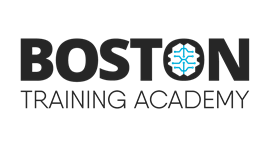

# Introduction

Data preparation is very important for all machine learning problems. Most of the real world datasets have Noise in the data, data may also be unsuitable for predictive task or EDA that you want to apply. 

Data may suffer from many defects, including :-
    a). Missing Data
    b). Duplications
    c). Incorrect data types including categorical data
    d). Outliers
    e). Inconsistencies in data representation e.g. Rating was “1,2,3”, now rating “A, B, C”
    
The purpose of data preparation is to transform data sets so that their information content is best exposed to solve given problem. 
Important advantages of preprocessing include :-
    a). Error prediction rate should be lower (or the same) after the preparation as before it
    b). Less computation and higher performance is achieved because of preprocessing

Preprocessing Techniques covered in this tutorial are :-

1). Label Encoding

2).  Handling Missing Features with Imputation

3). Scaling and Normalization

4). Dummy Variables for dealing with Categorical Values


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Exploring Categorical Features

The Gapminder dataset also contains a categorical 'Region' feature.  In this exercise we first explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')


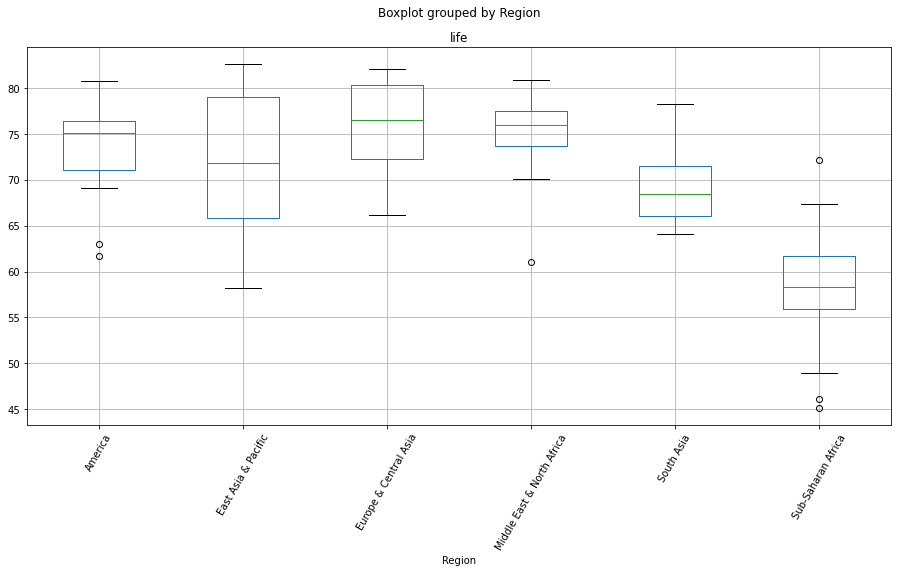

In [4]:
fig, ax = plt.subplots(figsize=(15,7))
df = pd.read_csv('gm_2008_region.csv')
print(df.columns)

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60,ax=ax)

# Show the plot
plt.show()


# Dummy Variables

As we know,  scikit-learn does not accept non-numerical features. You saw in the graph above that the 'Region' feature contains very useful information that can predict life expectancy. 
For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy,  it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.


In [5]:
# Print the columns of df_region
print("Dataframe with Region:\n ",df.info())

print("Dataframe head containing Region column :\n", df['Region'].head(10))

# Create dummy variables: df_region
df_region1 = pd.get_dummies(df)

print("Dataframe after creating dummy columns without dropping region :\n ",df_region1.info())

# Create dummy variables with drop_first=True: df_region
df_region2 = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print("Dataframe Region with Dummy Columns but dropping first dummy column : \n",df_region2.info())

print("Dataframe Region columns after dummification step :\n ", df_region2.iloc[:10,9:11])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB
Dataframe with Region:
  None
Dataframe head containing Region column :
 0    Middle East & North Africa
1            Sub-Saharan Africa
2                       America
3         Europe & Central Asia
4           East Asia & Pacific
5         Europe & Central Asia
6         Europe & Centra

# Setting Up for Label Encoding

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.
Sometimes, you might just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value.

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target
print("X Shape : ",X.shape)
print("Y Shape : ",Y.shape)

X Shape :  (506, 13)
Y Shape :  (506,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

In [8]:
import numpy as np
X = np.random.uniform(0.0, 1.0, size=(10, 2))
Y = np.random.choice(('Male','Female'), size=(10))
print("X : ",X)
print("Y : ",Y)

X :  [[7.80582010e-01 2.75589289e-01]
 [8.50054972e-01 6.90041775e-01]
 [1.01627794e-01 4.96322839e-01]
 [5.99920850e-01 7.45466572e-01]
 [1.81639170e-01 7.04337904e-01]
 [9.48403797e-01 3.84945737e-02]
 [1.39912248e-01 5.14187332e-04]
 [8.63951113e-01 4.67601326e-02]
 [6.57499971e-01 6.90766678e-01]
 [2.03176133e-01 4.34780819e-01]]
Y :  ['Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male']


# Label Encoding

The first option is to use the LabelEncoder class, which adopts a dictionary-oriented approach, associating to each category label a progressive integer number, that is an index of an instance array called classes_:

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(Y)
print(yt)

[1 1 1 0 1 0 0 1 1 0]


In [8]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Yb = lb.fit_transform(Y)
print("Yb : ",Yb)
print("Inverse Transformation : ",lb.inverse_transform(Yb))

Yb :  [[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]
Inverse Transformation :  ['Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Female']


# Handling Missing Features

Sometimes a dataset can contain missing features, so there are a few options that can be taken into account:

1). Removing the whole line

2). Creating sub-model to predict those features

3). Using an automatic strategy to input them according to the other known values

In [9]:
from sklearn.impute import SimpleImputer
data = np.array([[1, np.nan, 2], [2, 3, np.nan], [-1, 4, 2]])
print("data : ",data)
# Mean Strategy
imp = SimpleImputer(strategy='mean')
trans_data = imp.fit_transform(data)
print("Transformed Data using mean strategy : \n",trans_data)
# Median Strategy
imp = SimpleImputer(strategy='median')
trans_data = imp.fit_transform(data)
print("Transformed Data using median strategy : \n",trans_data)
# Most Frequent
imp = SimpleImputer(strategy='most_frequent')
trans_data = imp.fit_transform(data)
print("Transformed Data using most frequent strategy : \n",trans_data)

data :  [[ 1. nan  2.]
 [ 2.  3. nan]
 [-1.  4.  2.]]
Transformed Data using mean strategy : 
 [[ 1.   3.5  2. ]
 [ 2.   3.   2. ]
 [-1.   4.   2. ]]
Transformed Data using median strategy : 
 [[ 1.   3.5  2. ]
 [ 2.   3.   2. ]
 [-1.   4.   2. ]]
Transformed Data using most frequent strategy : 
 [[ 1.  3.  2.]
 [ 2.  3.  2.]
 [-1.  4.  2.]]


# Dropping Missing Data

The voting dataset contained a bunch of missing values. Now, it's time for you to take care of these !

The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell with the .head() method. You will see that there are certain data points labeled with a '?'. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be very messy! If you're lucky, the missing values will already be encoded as NaN. 

We use NaN because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well as scikit-learn's Imputation transformer Imputer().

In this exercise, we convert the '?'s to NaNs, and then drop the rows that contain them from the DataFrame.


In [10]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('house-votes-84.csv',header=None)

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print("The number of NaNs :\n",df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))


The number of NaNs :
 0       0
1      12
2      48
3      11
4      11
5      15
6      11
7      14
8      15
9      22
10      7
11     21
12     31
13     25
14     17
15     28
16    104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


# Imputing Missing Data

Real-world data often has missing values.

Data can have missing values for a number of reasons such as observations that were not recorded and data corruption.

Handling missing data is important as many machine learning algorithms do not support data with missing values.

As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. 

Imputation allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The Imputer class operates directly on the NumPy array instead of the DataFrame.

Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.


In [11]:
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
dataset = read_csv('pima-indians-diabetes.data.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, np.NaN)
# fill missing values with mean column values
values = dataset.values

imputer = SimpleImputer()

transformed_values = imputer.fit_transform(values)

# count the number of NaN values in each column
print("NaN values count :- ",np.isnan(transformed_values).sum())



NaN values count :-  0


# Data Scaling and Normalization

A generic dataset (we assume here that it is always numerical) is made up of different values which can be drawn from different distributions, having different scales and, sometimes, there are also outliers. A machine learning algorithm isn't naturally able to
distinguish among these various situations, and therefore, it's always preferable to standardize datasets before processing them.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

ss = StandardScaler()
features, target = load_wine(return_X_y=True)

scaled_data = ss.fit_transform(features)
print('Unscaled Data:\n',features)
print("Scaled Data :\n",scaled_data)

Unscaled Data:
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Scaled Data :
 [[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [13]:
from sklearn.preprocessing import Normalizer
import numpy as np

data = np.array([1.0, 2.0])
n_max = Normalizer(norm='max')
norm_data = n_max.fit_transform(data.reshape(1, -1))
print("Norm Data(max) :\n ",norm_data)
n_l1 = Normalizer(norm='l1')
norm_data = n_l1.fit_transform(data.reshape(1, -1))
print("Norm Data(l1) :\n ",norm_data)
n_l2 = Normalizer(norm='l2')
n_l2.fit_transform(data.reshape(1, -1))
print("Norm Data(l2) :\n ",norm_data)

Norm Data(max) :
  [[0.5 1. ]]
Norm Data(l1) :
  [[0.33333333 0.66666667]]
Norm Data(l2) :
  [[0.33333333 0.66666667]]


# MinMax Scaler

The MinMaxScaler is the probably the most famous scaling algorithm. It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

This scaler works better for cases in which the standard scaler might not work so well. If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better.

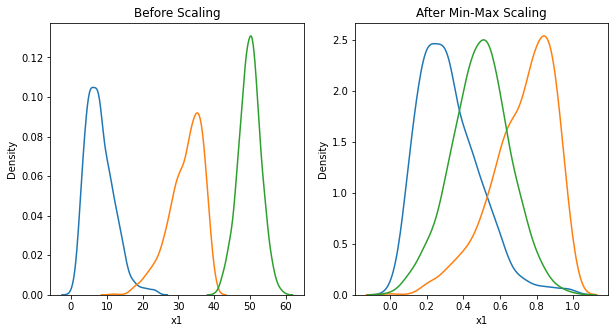

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

# Robust Scaler

The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. 

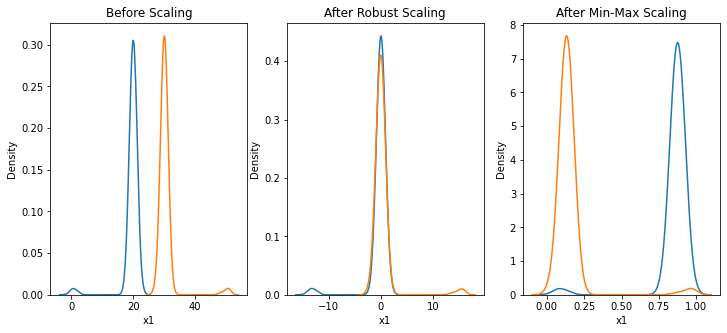

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()

# Normalizer

The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.



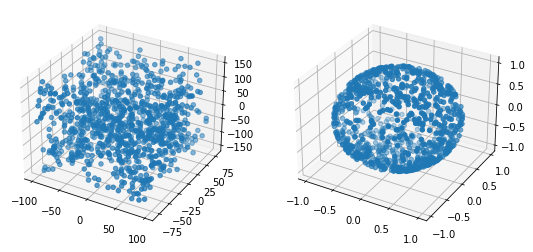

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1'])
plt.show()

# Feature Selection

Two examples of feature selection that use the classes SelectKBest (which selects the best K high-score features) and SelectPercentile (which selects only a subset of features
belonging to a certain percentile) are shown next. It's possible to apply them both to regression and classification datasets, being careful to select appropriate score functions.

In [17]:
#SelectKBest features
from sklearn.datasets import load_boston, load_iris
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_regression
regr_data = load_boston()
print(regr_data.data.shape)
kb_regr = SelectKBest(f_regression)
X_b = kb_regr.fit_transform(regr_data.data, regr_data.target)
print(X_b.shape)
print(kb_regr.scores_)

(506, 13)
(506, 10)
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


c:\users\boston\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [18]:
class_data = load_iris()
print(class_data.data.shape)
perc_class = SelectPercentile(chi2, percentile=15)
X_p = perc_class.fit_transform(class_data.data, class_data.target)
print(X_p.shape)
print(perc_class.scores_)

(150, 4)
(150, 1)
[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


# Principal Component Analysis

In many cases, the dimensionality of the input dataset X is high and so is the complexity of every related machine learning algorithm. Moreover, the information is seldom spread
uniformly across all the features and, as discussed in the previous chapter, there will be high entropy features together with low entropy ones, which, of course, don't contribute
dramatically to the final outcome. 

It's possible to project the original feature vectors into this new (sub-)space, where each component carries a portion of total variance and where the new covariance matrix is
decorrelated to reduce useless information sharing (in terms of correlation) among different features. In scikit-learn, there's the PCA class which can do all this in a very smooth way.


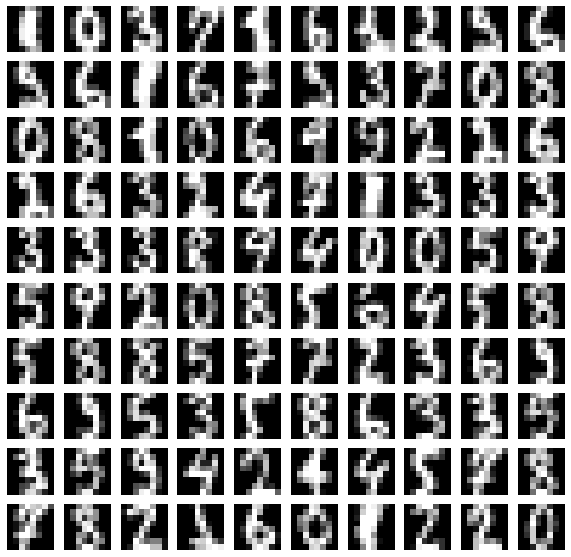

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()

# Show some random digits
selection = np.random.randint(0, 1797, size=100)

fig, ax = plt.subplots(10, 10, figsize=(10, 10))

samples = [digits.data[x].reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()


Each image is a vector of 64 unsigned int (8 bit) numbers (0, 255), so the initial number of components is indeed 64. However, the total amount of black pixels is often predominant and the basic signs needed to write 10 digits are similar, so it's reasonable to assume both high cross-correlation and a low variance on several components. Trying with 36 principal components, we get:

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.00489539 0.00428888
 0.00373602 0.00353272 0.00336673 0.00328026 0.00308316 0.00293764]


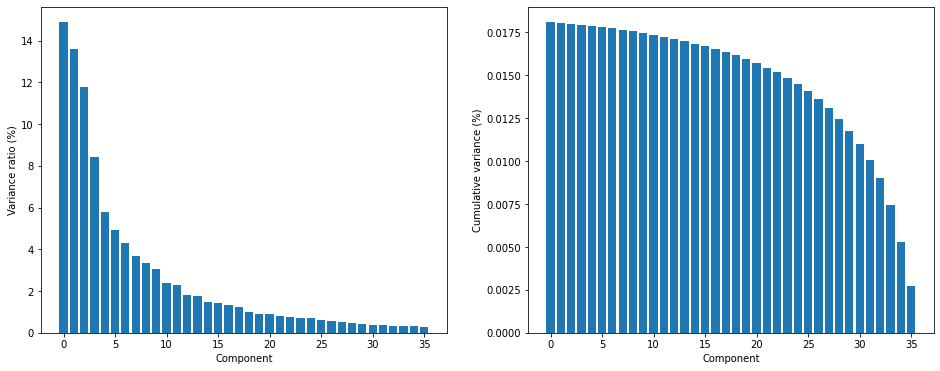

In [20]:
pca = PCA(n_components=36, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_xlabel('Component')
ax[0].set_ylabel('Variance ratio (%)')
ax[0].bar(np.arange(36), pca.explained_variance_ratio_ * 100.0)

ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative variance (%)')
ax[1].bar(np.arange(36), np.cumsum(pca.explained_variance_)[::-1])

plt.show()

As expected, the contribution to the total variance decreases dramatically starting from the fifth component, so it's possible to reduce the original dimensionality without an
unacceptable loss of information, which could drive an algorithm to learn wrong classes. In the preceding graph, there are the same handwritten digits rebuilt using the first 36
components with whitening and normalization between 0 and 1.

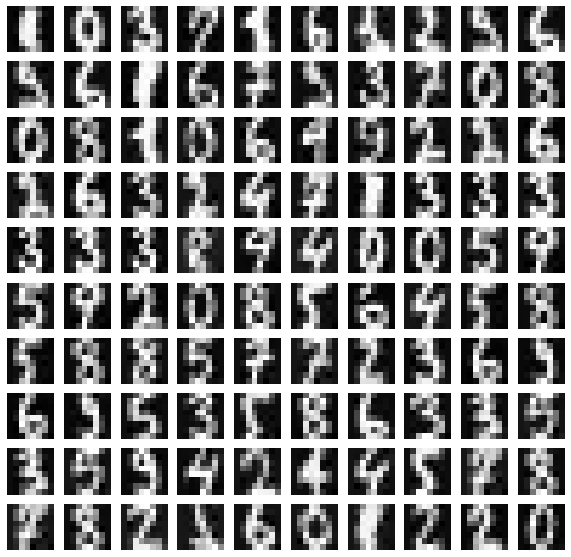

In [21]:
X_rebuilt = pca.inverse_transform(X_pca)
# Rebuild from PCA and show the result
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

samples = [pca.inverse_transform(X_pca[x]).reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()
